<a href="https://colab.research.google.com/github/KrushnaTaur/ML-Practice/blob/main/03_Exploratory_Data_Analysis/03_Correlation_and_Heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [2]:
# Step 2: Create Sample Dataset (or load your own)
np.random.seed(0)
data = {
    'Age': np.random.randint(18, 60, 100),
    'Salary': np.random.randint(30000, 120000, 100),
    'Experience': np.random.randint(1, 20, 100),
    'Purchase_Amount': np.random.randint(1000, 20000, 100),
    'Credit_Score': np.random.randint(300, 850, 100)
}

df = pd.DataFrame(data)
df.head()

,Age,Salary,Experience,Purchase_Amount,Credit_Score
0,18,114355,11,17957,501
1,21,78682,12,7797,737
2,21,96509,6,6637,497
3,57,116384,16,12471,372
4,27,105751,9,15799,546


In [3]:
# Step 3: Compute Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:\n")
print(corr_matrix)

Correlation Matrix:

                      Age    Salary  Experience  Purchase_Amount  Credit_Score
Age              1.000000  0.172698    0.021734         0.028586      0.110963
Salary           0.172698  1.000000   -0.103684         0.185253     -0.062004
Experience       0.021734 -0.103684    1.000000        -0.215447     -0.021540
Purchase_Amount  0.028586  0.185253   -0.215447         1.000000     -0.098514
Credit_Score     0.110963 -0.062004   -0.021540        -0.098514      1.000000


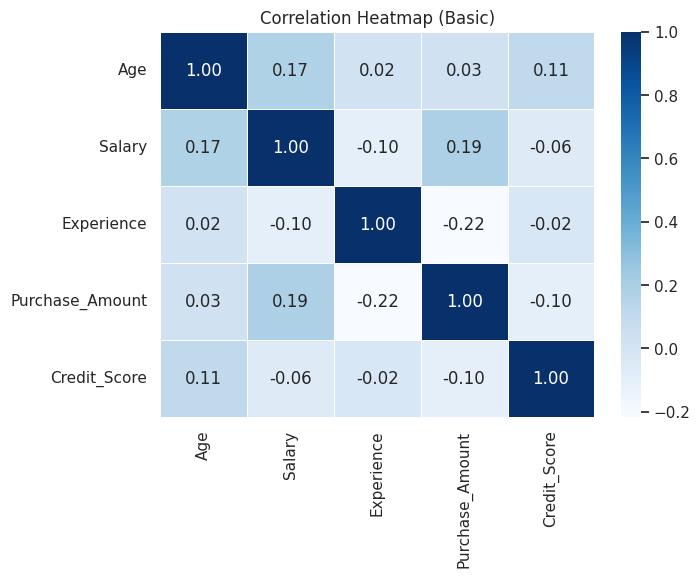

In [4]:
# Step 4: Basic Heatmap Visualization
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Basic)')
plt.show()

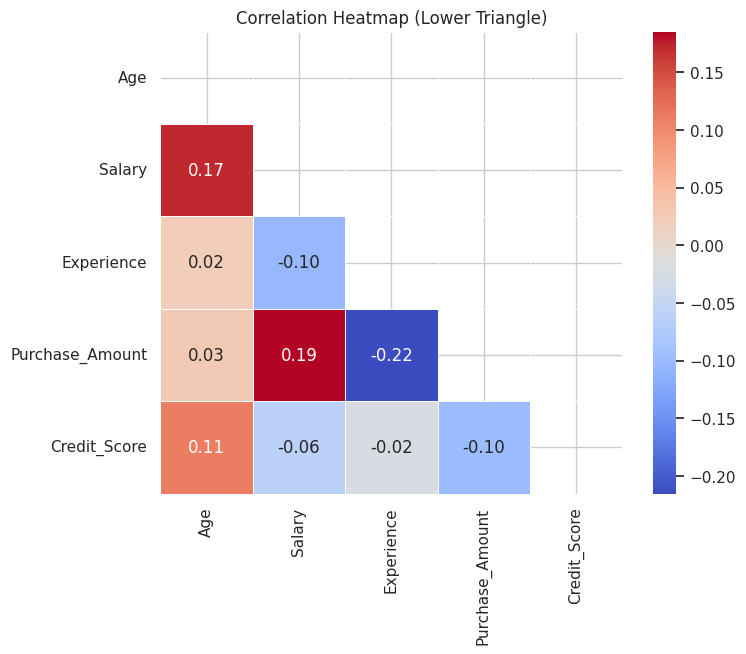

In [5]:
# Step 5: Advanced Heatmap (with style & mask)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # show only lower triangle
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap (Lower Triangle)')
plt.show()

In [6]:
# Step 6: Identify Strongly Correlated Features (Multicollinearity Check)
# We'll consider correlation > 0.8 or < -0.8 as strong correlation
threshold = 0.8
strong_corr = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1.0)]

print("⚠️ Strongly Correlated Pairs (Possible Multicollinearity):\n")
for col in strong_corr.columns:
    correlated_features = strong_corr.index[strong_corr[col].notnull()].tolist()
    for feat in correlated_features:
        print(f"{col} ↔ {feat} : {corr_matrix.loc[col, feat]:.2f}")


⚠️ Strongly Correlated Pairs (Possible Multicollinearity):



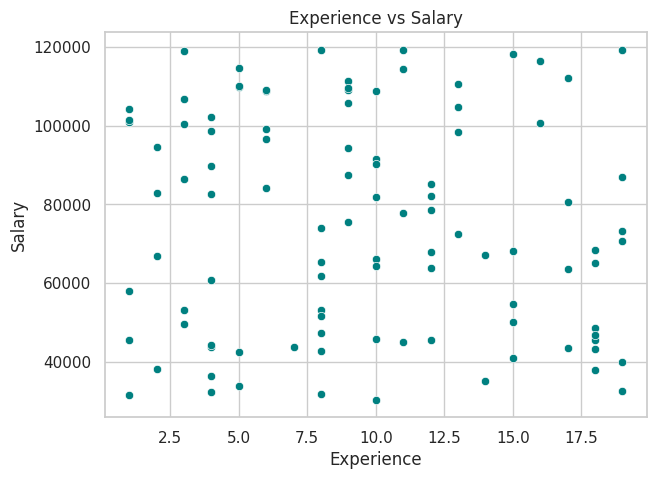

In [7]:
# Step 7: Visualize relationship between any two highly correlated features
# (Example: Salary vs Experience)
plt.figure(figsize=(7,5))
sns.scatterplot(x='Experience', y='Salary', data=df, color='teal')
plt.title('Experience vs Salary')
plt.show()
